In [1]:
from engine import Atom
from nn import MLP, mse_loss
from utils import draw_dot

In [2]:
x1 = Atom(2.0, label='x1')
x2 = Atom(0.0, label='x2')
w1 = Atom(-3.0, label='w1')
w2 = Atom(1.0, label='w2')
b = Atom(6.8814, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
o.label = 'o'
o.backward()

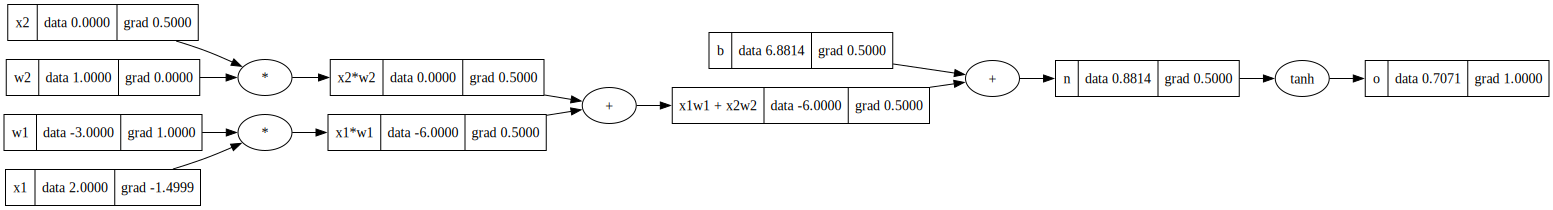

In [3]:
draw_dot(o)

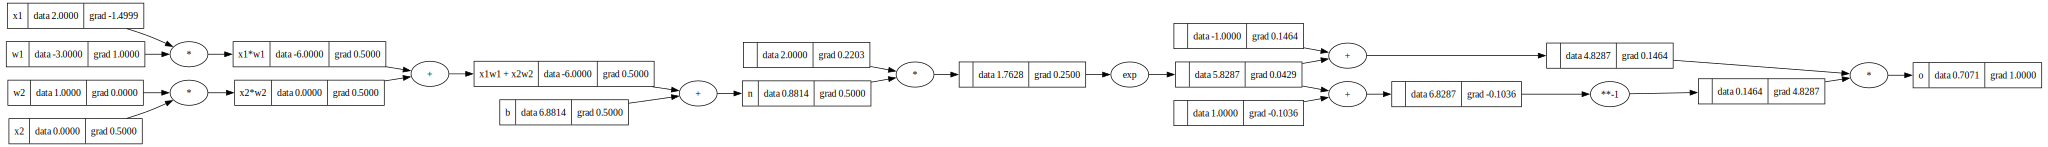

In [4]:
x1 = Atom(2.0, label='x1')
x2 = Atom(0.0, label='x2')
w1 = Atom(-3.0, label='w1')
w2 = Atom(1.0, label='w2')
b = Atom(6.8814, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b
n.label = 'n'

e = (2 * n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'
o.backward()
draw_dot(o)

In [5]:
n = MLP(3, [4,4,1])
ex = [
	[2.0, 3.0, -1.0], 
	[3.0, -1.0, 0.5],
	[0.5, 1.0, 1.0], 
	[1.0, 1.0, -1.0]
]
targets = [1.0, -1.0, -1.0, 1.0]

In [6]:
lr = 0.1
for k in range(50):
	# forward pass
	preds = [n(x) for x in ex]
	loss = mse_loss(targets, preds)
	
	# backward pass
	for p in n.parameters():
		p.grad = 0.0
	loss.backward()
	
	# update
	for p in n.parameters():
		p.data += -lr * p.grad
	print(f'Epoch: {k}, Loss: {loss.data}')

Epoch: 0, Loss: 7.974438869837233
Epoch: 1, Loss: 6.886174456304674
Epoch: 2, Loss: 3.9120475673597954
Epoch: 3, Loss: 3.082547116870738
Epoch: 4, Loss: 1.0767337942269815
Epoch: 5, Loss: 0.09392455566187478
Epoch: 6, Loss: 0.04595689425470925
Epoch: 7, Loss: 0.034541795130422076
Epoch: 8, Loss: 0.028502312916398695
Epoch: 9, Loss: 0.024614038448492585
Epoch: 10, Loss: 0.021842434513128884
Epoch: 11, Loss: 0.0197376373078567
Epoch: 12, Loss: 0.018068447649643528
Epoch: 13, Loss: 0.01670237207150739
Epoch: 14, Loss: 0.015557355803956138
Epoch: 15, Loss: 0.014579521467931225
Epoch: 16, Loss: 0.013731835162886745
Epoch: 17, Loss: 0.012987883529368771
Epoch: 18, Loss: 0.012328246317380082
Epoch: 19, Loss: 0.011738276250879752
Epoch: 20, Loss: 0.011206683922508577
Epoch: 21, Loss: 0.010724604266136561
Epoch: 22, Loss: 0.010284962269451603
Epoch: 23, Loss: 0.009882030809390301
Epoch: 24, Loss: 0.00951111540221827
Epoch: 25, Loss: 0.009168324919759191
Epoch: 26, Loss: 0.008850401843828477
Epo

In [7]:
preds

[Atom(data=0.9635126521919867),
 Atom(data=-0.9724545718825539),
 Atom(data=-0.9568389646852876),
 Atom(data=0.9684092848512065)]

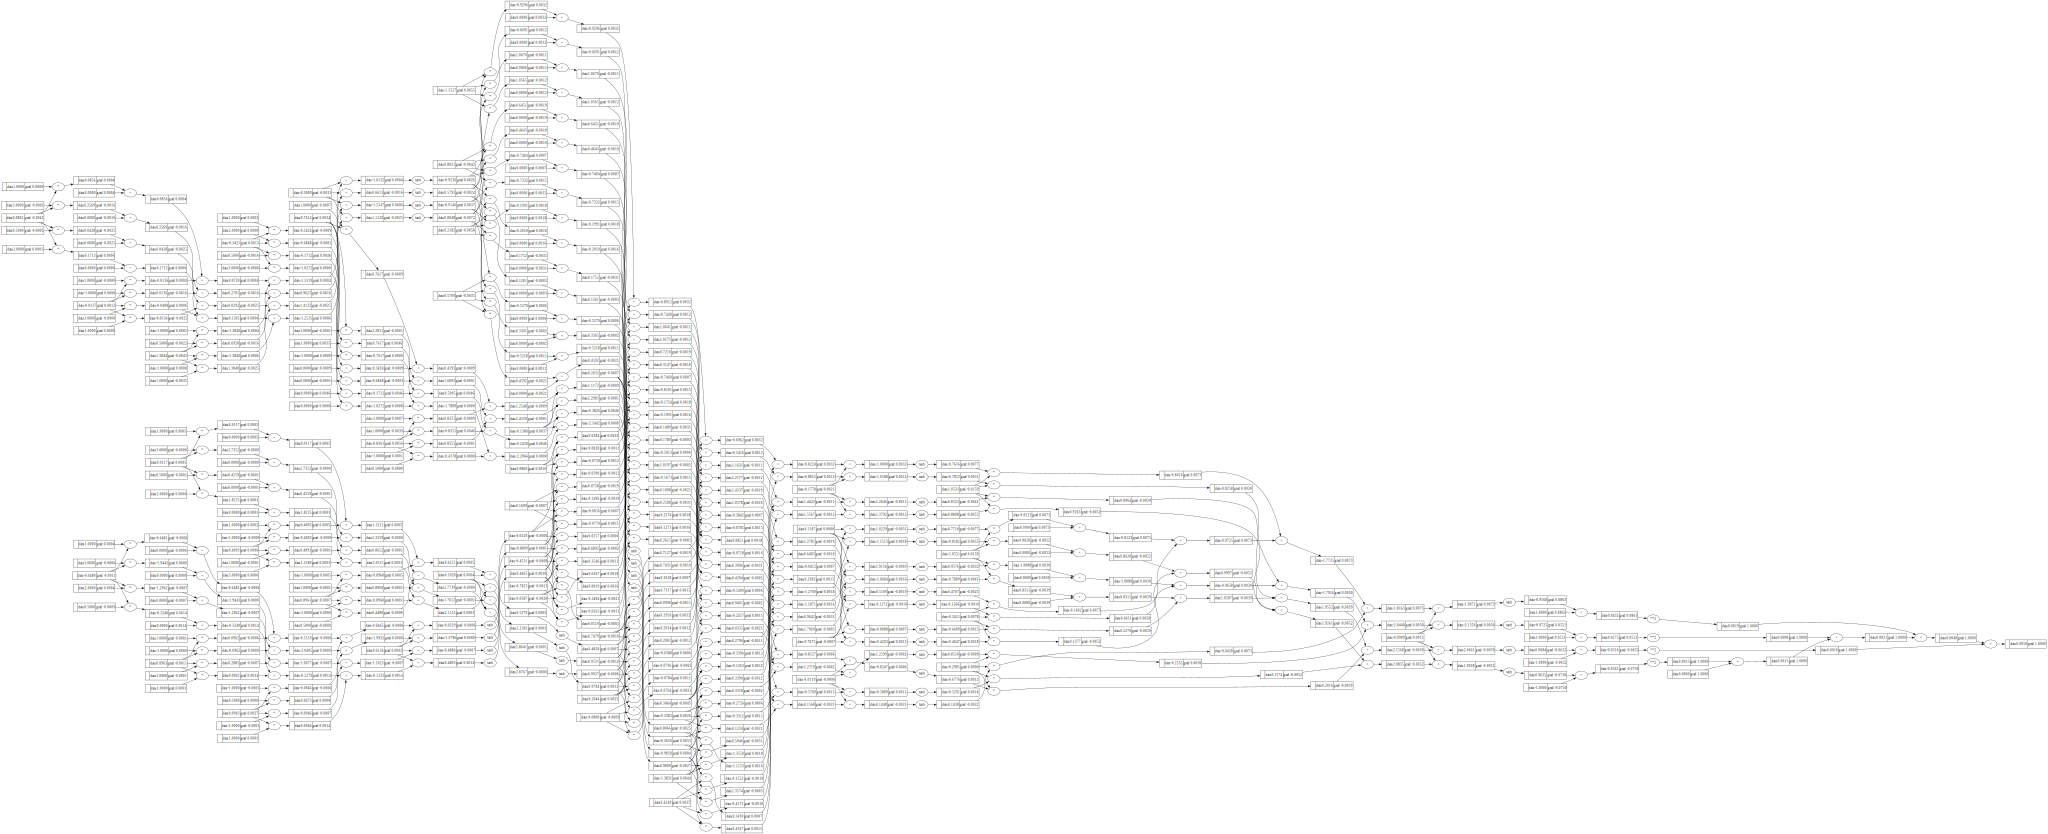

In [8]:
draw_dot(loss)